QUESTION 1:

The standard deviation measures how spread out the data points are around the mean of a dataset. This can show how the data deviates from the original value in a way.

The standard error of the mean quantifies how much of the sample mean is expected to deffrientiate if new samples were picked from the data/ population.

To sum everything up the standard deviation shows the variability within the data while the standard error of the mean shows the variability of the estimate mean if it were tog o across multiple different samples.

QUESTION 6:

1. Bootstrapping is a resampleing technique used to estimate the sampling distrubution of a statistic and/or dataset by resampling it.

- First off from the original sample size (take size of n for example) you create a bigger number (for example 10000) of "bootstrap samples" by randomly selecting data points with replacement. Then for each bootstrap sample you calculate what youre looking for, for example the mean. Then you collect all of these statistics you just calculated and create a bootstrap distubution and using that distubution you can use it to estimate standard errors, confidence intervals etc...

2. The main purpose of bootstrapping is to approximate the sampling distrubution of a statistic and/ or dataset by resampling with replacment from the original statistic/ dataset. Bootstrapping overall helps create more accurate and reliable staistical inferences by using the data within the dataset itself. It is also useful when conventional methods dont work for reasons like the sample size is too small or if there were unknown underlying distibutions.


3. You can use bootstrapping to find out whether you hypthesized mean is plausible by repeatedly resampling your original dataset with replacments to create a large number of bootstrap samples. Then for each bootstrap sample you'd calculate the mean to build a bootstrap distubution of the sample means. Then you'd construct a confidence interval from this boostrap distubution. And if your hypothosized mean is falls within the interval then it could sugggest that the hypothesized data is plausable and if it falls out it indicates that the hypothesized mean may not be consistent with the obeseved data.

QUESTION 8:

NOTE: in this case the null hypothesis represents the idea that the vaccine has no affect. The purpose of this upcoming bootstrapping etc... is to find whether this is true or not and if the vaccine is useful or not. 

DIRECTLY FROM CHATBOT: In statistical terms the null hypothesis assumes that the true mean differnce between initial and final health scores is zero. The purpose of the analysis is to test whether we have enough evidence to reject the hypothesis and conclude that the vaccine is effective.

CHAT SESSION: https://chatgpt.com/share/66ff359a-1170-8007-8f40-45409b261941

CSV file 'vaccine_data.csv' created successfully.
Data read from CSV file:
    PatientID  Age Gender  InitialHealthScore  FinalHealthScore
0          1   45      M                  84                86
1          2   34      F                  78                86
2          3   29      M                  83                80
3          4   52      F                  81                86
4          5   37      M                  81                84
5          6   41      F                  80                86
6          7   33      M                  79                86
7          8   48      F                  85                82
8          9   26      M                  76                83
9         10   39      F                  83                84


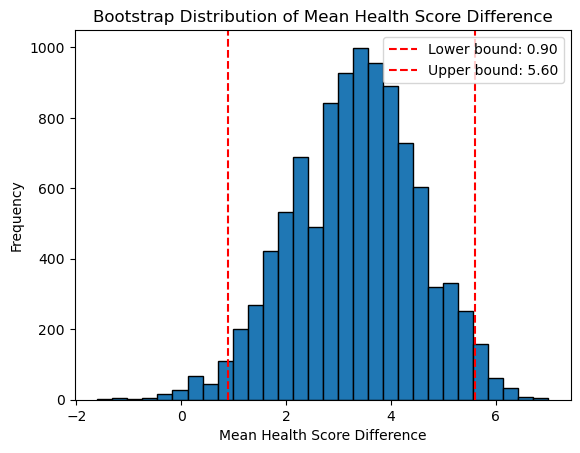

95% Confidence Interval for the mean difference: (0.90, 5.60)


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data dictionary (your provided data)
data_dict = {
    "PatientID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    "Gender": ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    "InitialHealthScore": [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    "FinalHealthScore": [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

# Convert the dictionary into a pandas DataFrame
data = pd.DataFrame(data_dict)

# Save the DataFrame to a CSV file
data.to_csv('vaccine_data.csv', index=False)  # index=False avoids writing row numbers to the file
print("CSV file 'vaccine_data.csv' created successfully.")

# Read the CSV file back into the program
data_from_csv = pd.read_csv('vaccine_data.csv')
print("Data read from CSV file:\n", data_from_csv)

# Calculate the difference between final and initial health scores
data_from_csv['HealthScoreDiff'] = data_from_csv['FinalHealthScore'] - data_from_csv['InitialHealthScore']

# Set a seed for reproducibility
np.random.seed(42)

# Bootstrapping
n_iterations = 10000
boot_means = []

# Loop through iterations and resample
for _ in range(n_iterations):
    # Resample with replacement and compute the mean of the difference
    sample = np.random.choice(data_from_csv['HealthScoreDiff'], size=len(data_from_csv), replace=True)
    boot_means.append(np.mean(sample))

# Convert boot_means to a NumPy array for further analysis
boot_means = np.array(boot_means)

# Confidence interval calculation
lower_bound = np.percentile(boot_means, 2.5)
upper_bound = np.percentile(boot_means, 97.5)

# Plotting the bootstrap distribution
plt.hist(boot_means, bins=30, edgecolor='k')
plt.axvline(lower_bound, color='red', linestyle='--', label=f'Lower bound: {lower_bound:.2f}')
plt.axvline(upper_bound, color='red', linestyle='--', label=f'Upper bound: {upper_bound:.2f}')
plt.title('Bootstrap Distribution of Mean Health Score Difference')
plt.xlabel('Mean Health Score Difference')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Output the confidence interval
print(f"95% Confidence Interval for the mean difference: ({lower_bound:.2f}, {upper_bound:.2f})")


Analysis - Here I used bootstrapping to resample the health score differences 100000 times. For each resample, I calcualted the mean difference to estimate the average health improvment. The purpose of this was to create a confidence interval for the true mean difference and determine if there's statistical evidence of an effect.

Conclusion for null hypothesis - After performing the boostrapping I found that the 95% confidence interval for the mean difference did not include zero. This means that I can disregard the null hypothesis of no effect and conlcude the vaccine has a statistically proven positive effect on health scores.

CHAT SESSION (includes generation of code): https://chatgpt.com/share/66ff35fa-799c-8007-ac8d-5bc068b348be